<a href="https://colab.research.google.com/github/StormBreak3R/Machine-Learning/blob/main/Loan_Status_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [132]:
df = pd.read_csv("loan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [134]:
df.shape

(614, 13)

In [135]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [136]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [137]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [138]:
df = df.replace(to_replace='3+', value=4)

In [139]:
df["Dependents"].value_counts()

0    345
1    102
2    101
4     51
Name: Dependents, dtype: int64

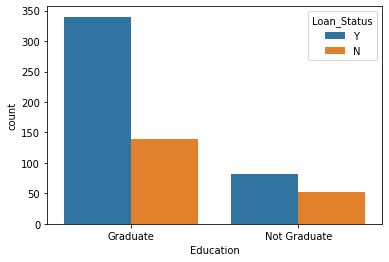

In [140]:
sns.countplot(x= "Education", hue= "Loan_Status", data= df)

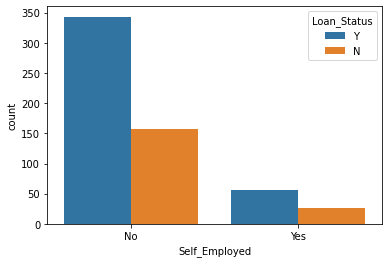

In [141]:
sns.countplot(x= "Self_Employed", hue= "Loan_Status", data= df)

In [142]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [143]:
df["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [144]:
df.replace({"Gender": {"Male": 1, "Female": 0}, 
            "Married": {"Yes": 1, "No": 0},
            "Education": {"Graduate": 1, "Not Graduate": 0},
            "Self_Employed": {"Yes": 1, "No": 0},
            "Property_Area": {"Urban": 1, "Rural": 0, "Semiurban": 2},
            "Loan_Status": {"Y": 1, "N": 0}
            }, inplace= True)

In [145]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [146]:
df["LoanAmount"].fillna(df["LoanAmount"].mean(), inplace= True)

In [147]:
df = df.fillna(df.mode().iloc[0])

In [148]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [149]:
X = df.drop(["Loan_ID", "Loan_Status"], axis= 1)
y = df["Loan_Status"]

In [150]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,1
1,1.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,0
2,1.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,1
3,1.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,1
4,1.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,1


In [151]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn import svm

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state= 13)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(552, 11) (62, 11) (552,) (62,)


In [153]:
clf = svm.SVC()

In [154]:
clf.fit(X_train, y_train)
train_data_prediction = clf.predict(X_train)
print(accuracy_score(train_data_prediction, y_train))
print(classification_report(train_data_prediction, y_train))

0.6847826086956522
              precision    recall  f1-score   support

           0       0.02      1.00      0.03         3
           1       1.00      0.68      0.81       549

    accuracy                           0.68       552
   macro avg       0.51      0.84      0.42       552
weighted avg       0.99      0.68      0.81       552



In [155]:
clf.fit(X_train, y_train)
test_data_prediction = clf.predict(X_test)
print(accuracy_score(test_data_prediction, y_test))
print(classification_report(test_data_prediction, y_test))

0.7580645161290323
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.76      0.86        62

    accuracy                           0.76        62
   macro avg       0.50      0.38      0.43        62
weighted avg       1.00      0.76      0.86        62



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [156]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [158]:
LR.fit(X_train, y_train)
train_data_prediction1 = LR.predict(X_train)
test_data_prediction1 = LR.predict(X_test)

print("Train Data Accuracy:" , accuracy_score(train_data_prediction1, y_train))
print("Test Data Accuracy: ", accuracy_score(test_data_prediction1, y_test))

Train Data Accuracy: 0.7952898550724637
Test Data Accuracy:  0.8225806451612904


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
